# Mapping Tree Species Across the Petawawa Research Forest using LiDAR

In [1]:
import pandas as pd
import geopandas as gpd
import geodatasets
import rasterio
from rasterio.plot import show
import contextily as cx
from matplotlib import pyplot as plt


Load the dataset below. This reads data regarding the Petawawa Research Forest.

In [2]:
# Load data and set filepaths
als_metrics = r'data/petawawa_species/als_metrics.tif'

plot_locs_fpath = r'data/petawawa_species/plot_locations.gpkg'
plots_xy = gpd.read_file(plot_locs_fpath)

prf_boundary_fpath = r'data/petawawa_species/prf_boundary.gpkg'
prf_boundary = gpd.read_file(prf_boundary_fpath)

sp_codes = r'data/petawawa_species/sp_codes.csv'
sp_codes_df = pd.read_csv(sp_codes).rename(columns={'Name': 'species'})

plot_data_fpath = r'data/petawawa_species/plot_data.xlsx'
plots_df = (pd.read_excel(plot_data_fpath, sheet_name='Plotsum')
            .rename(columns={'Leadsp': 'MNR Code'})
            .merge(sp_codes_df, how='left', on='MNR Code'))


Let's map the location of Petawawa to get a sense of the surrounding geography.

Text(0.5, 1.0, 'Petawawa Research Forest')

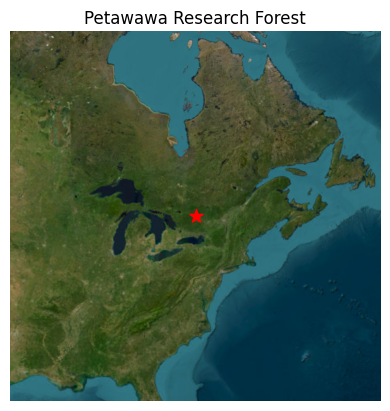

In [3]:
# View petawawa location

prf_boundary.centroid[0]
prf_center = gpd.GeoSeries(prf_boundary.centroid[0], crs=prf_boundary.crs)

prf_buf = prf_boundary.copy()
prf_buf.geometry = prf_buf.geometry.buffer(1_750_000, cap_style='square')

fig, ax = plt.subplots()
prf_buf.plot(ax=ax, facecolor='none', edgecolor='none')
prf_center.plot(ax=ax, color='red', marker='*', markersize=100)
ax.set_axis_off()

cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery,
                attribution="", crs=prf_boundary.crs)

plt.title('Petawawa Research Forest')

We’ll print the dataset to better understand the available features.

In [4]:
print(plots_df.head())

  PlotName Status     BA_all  TPH_all  DCD_Count  PlantProp origin  \
0   PRF001      D   0.251353       32        NaN    1.00000      P   
1   PRF001      L  33.601655     2688        4.0    0.22592      N   
2   PRF002      L  44.127504    15392        7.0    0.00000      N   
3   PRF003      D   3.615982       96        NaN    0.00000      N   
4   PRF003      L  28.489549      784       20.0    0.00000      N   

         tvol        mvol   ba_merch  ...     HL_all   HL_merch     FU  \
0    1.381989    0.000000   0.251353  ...  11.488825  11.488825    NaN   
1  323.132202  241.738524  29.076337  ...  22.944812  24.935425   PWus   
2  353.671565  298.646059  25.101346  ...  19.961161  30.817948   PWus   
3   28.793416   26.305051   3.615982  ...  20.624830  20.624830    NaN   
4  253.695027  223.463661  28.489549  ...  19.994438  19.994438  MXHcc   

   MurrayFU  dbhmax  dbh95   dbhq_all  dbhq_merch           species  \
0      Dead    10.1   10.1  10.000500   10.000500       White p

This code opens a raster dataset (`als_metrics`) using Rasterio, extracts metadata like band names and the coordinate reference system, and then reads the second raster band (here representing mean height values). 

It then uses Matplotlib to display that band as an image, coloring values with the viridis colormap. The axis ticks are removed for a cleaner look, and a colorbar is added to show that pixel values correspond to mean height in meters.

('avg_95', 'avg', 'b10', 'b20', 'b30', 'b40', 'b50', 'b60', 'b70', 'b80', 'b90', 'dns_10m', 'dns_12m', 'dns_14m', 'dns_15m', 'dns_16m', 'dns_18m', 'dns_20m', 'dns_25m', 'dns_2m', 'dns_4m', 'dns_5m', 'dns_6m', 'dns_8m', 'kur_95', 'p01', 'p05', 'p10', 'p20', 'p30', 'p40', 'p50', 'p60', 'p70', 'p80', 'p90', 'p95', 'p99', 'qav', 'skew_95', 'd0_2', 'd10_12', 'd12_14', 'd14_16', 'd16_18', 'd18_20', 'd20_22', 'd22_24', 'd24_26', 'd26_28', 'd28_30', 'd2_4', 'd30_32', 'd32_34', 'd34_36', 'd36_38', 'd38_40', 'd40_42', 'd42_44', 'd44_46', 'd46_48', 'd4_6', 'd6_8', 'd8_10', 'std_95', 'vci_1mbin', 'vci_0.5bin')


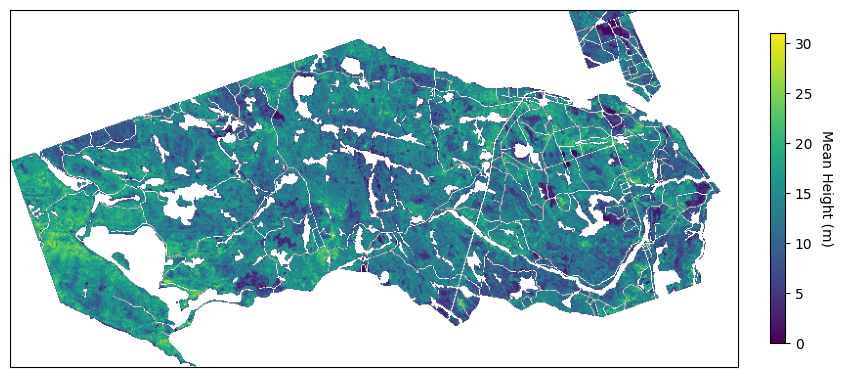

In [5]:
with rasterio.open(als_metrics) as src:
    band_names = src.descriptions

    prf_crs = src.crs

    print(band_names)

    mn_z = src.read(2)

fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(mn_z, cmap='viridis')

ax.set_xticks([])
ax.set_yticks([])

cbar = plt.colorbar(ax.images[0], ax=ax, fraction=0.02, pad=0.04)
cbar.set_label('Mean Height (m)', rotation=270, labelpad=15)
cbar.ax.tick_params(labelsize=10)

This code below visualizes survey plot locations within their boundary on a satellite basemap.

[]

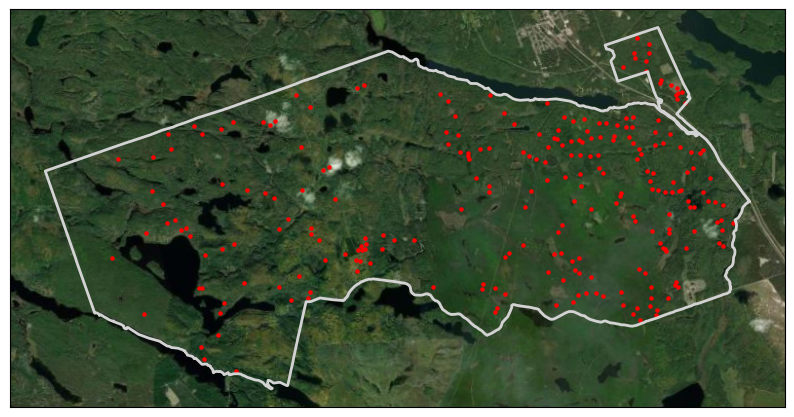

In [6]:
ax = plots_xy.plot(figsize=(10, 10), color='red', markersize=5)

prf_boundary.plot(ax=ax, facecolor='none', edgecolor='lightgrey', linewidth=2)

cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery,
               attribution="", crs=plots_xy.crs)

ax.set_xticks([])
ax.set_yticks([])